In [0]:
import numpy as np
import time as time
import matplotlib.pyplot as plt
import math
import itertools

In [0]:
def BruteForceSorted(input_):

  # num, b, c, a = importlist(input_)
  num, b, c, a = input_
  x_values = list(itertools.product([0, 1], repeat = num))
  
  feasible_z = []

  for x in range(len(x_values)):
      constraints_satisfied = 0
      for k in range(len(b)):
          if np.dot(x_values[x], a[k]) <= b[k]:
              constraints_satisfied += 1
      if constraints_satisfied == len(b): # only if all the constraints are satisfied
          obj = []
          for z in c:
              obj.append(np.dot(x_values[x], z))
          
          if obj not in feasible_z:
            feasible_z.append(obj)

  feasible_z = np.array(feasible_z)
  feasible_z = feasible_z[np.argsort(feasible_z[:, i])]

  next_point = 0  # Next index in the NDP array to search for 

  while next_point < len(feasible_z):
    ndp = np.any(feasible_z < feasible_z[next_point], axis = 1)
    ndp[next_point] = True
    feasible_z = feasible_z[ndp]
    next_point = np.count_nonzero(feasible_z[:next_point]) + 1

  return feasible_z

In [0]:
def BruteForceRemoveInPlace(input_):

  # num, b, c, a = importlist(input)
  num, b, c, a = input_
  x_values = list(itertools.product([0, 1], repeat = num))
  
  feasible_z = []

  for x in range(len(x_values)):
      constraints_satisfied = 0
      for k in range(len(b)):
          if np.dot(x_values[x], a[k]) <= b[k]:
              constraints_satisfied += 1
      if constraints_satisfied == len(b): # only if all the constraints are satisfied
          obj = []
          for z in c:
              obj.append(np.dot(x_values[x], z))
          
          if obj not in feasible_z:
            feasible_z.append(obj)

  feasible_z = np.array(feasible_z)
  NDPs = np.arange(feasible_z.shape[0])
  next_point = 0  # Next index in the NDP array to search for 
  
  while next_point < len(feasible_z):
    ndp = np.any(feasible_z < feasible_z[next_point], axis = 1)
    ndp[next_point] = True
    NDPs = NDPs[ndp]  # Remove dominated points
    feasible_z = feasible_z[ndp]
    next_point = np.sum(ndp[:next_point]) + 1

  return feasible_z

In [0]:
def BruteForceInitial(input_):

  # num, b, c, a = importlist(input)
  num, b, c, a = input_
  x_values = list(itertools.product([0, 1], repeat = num))
  
  feasible_z = []

  for x in range(len(x_values)):
      constraints_satisfied = 0
      for k in range(len(b)):
          if np.dot(x_values[x], a[k]) <= b[k]:
              constraints_satisfied += 1
      if constraints_satisfied == len(b): # only if all the constraints are satisfied
          obj = []
          for z in c:
              obj.append(np.dot(x_values[x], z))
          
          if obj not in feasible_z: # don't allow duplicates
              feasible_z.append(obj)

  feasible_z = np.array(feasible_z)
  NDPs = np.ones(feasible_z.shape[0], dtype = bool)
  
  for i, j in enumerate(feasible_z):
    if NDPs[i]: 
      NDPs[NDPs] = np.any(feasible_z[NDPs] < j , axis=1)
      NDPs[i] = True

  return feasible_z[NDPs]

In [0]:
def randInstanceGen(n,m,J,U):
    # Reset seed for safety
    np.random.seed(0)
    # Set seed
    np.random.seed(61836)
    
    c = np.random.randint(1,U+1,(J,n))
    a = np.random.randint(1,U+1,(n,m))
    
    b = np.max(a, axis=0)
    
    for i in range(0, m):
        if math.ceil(np.sum(a[:,i])/2) > b[i]:
            b[i] = math.ceil(np.sum(a[:,i])/2)
    
    return c, a, b

In [102]:
c, a, b = randInstanceGen(15, 1, 3, 40)
times(setup(c, a, b))

(6.214513778686523, 6.088672637939453, 6.070337533950806)

In [0]:
def setup(c, a, b):
  c = c*-1
  b = list(b)
  c = list(c)

  for j in range(len(c)):
    c[j] = list(c[j])

  att = []
  for i in range(a.shape[1]):
    att.append(list(a[:, i]))
  
  items = (len(c[0]), b, c, att)

  return items

In [0]:
def Complexity(m, num_obj, U):
  
  times = []
  num_items = []

  for ind in range(1, 51):
    c, a, b = randInstanceGen(10, ind, num_obj, U)
    num_items.append(ind)
    items = setup(c, a, b)
    start = time.time()
    ndf = BruteForce(items)
    end = time.time() - start
    times.append(end)

  plt.plot(num_items, times)
  plt.xlabel("Number of Constraints")
  plt.ylabel("Time (s)")
  plt.title("Brute Force Complexity")

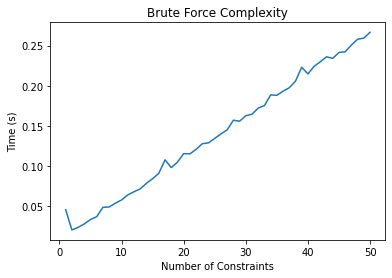

In [112]:
Complexity(2, 2, 40)

In [0]:
def times(items):
  s1 = time.time()
  ndf = BruteForceInitial(items)
  time1 = time.time() - s1

  s2 = time.time()
  ndf = BruteForceRemoveInPlace(items)
  time2 = time.time() - s2

  s3 = time.time()
  ndf = BruteForceSorted(items)
  time3 = time.time() - s3

  return time1, time2, time3